# Lecture 1: Data Acquisition & Visualization

## Package: Pandas
<img src = "https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/03/pandas.jpg" width = 200></img>
* We will focus on **DataFrame**.
* There are useful functions built in DataFrame:
    * read_csv(), read_excel()
    * sort_index(), sort_values(), dropna(), fillna()
    * head(), tail(), info(), shape, count()
    * index, columns, values
    * plot.line(), hist()
    * loc(), iloc()
    * mean(), std(), max(), min(), describe(), pct_change()
    * rolling(), apply()
    * pd.concat(), pd.merge()
* We start with the market data of 2330 and accomplish the following tasks:
    * Reading data from excel files;
    * Preprocessing data: dealing with the index;
    * Making plots for the data;
    * Making a birdview of the table;
    * Accessing data;
    * Calculating some indicators;
    * Output to files.


### Reading Data from Files

In [4]:
!wget https://www.csie.ntu.edu.tw/~d00922011/stats/data/2330tw.xlsx

/bin/bash: wget: command not found


In [5]:
import pandas as pd

df = pd.read_excel("2330tw.xlsx") # https://www.csie.ntu.edu.tw/~d00922011/stats/data/2330tw.xlsx

df.head()

,Date,Close Price,Volume
0,2021/06/28,590.0,9056869
1,2021/06/25,591.0,11355715
2,2021/06/24,590.0,11435647
3,2021/06/23,595.0,21500052
4,2021/06/22,578.0,17786329


### Preprocessing: Index

In [6]:
df.sort_values(by = "Date", inplace = True, ascending = True) # df = df.sort_values(by = "Date", ascending = True)

df.head()

,Date,Close Price,Volume
358,2020/01/02,326.9394,11224165
357,2020/01/03,327.4216,14295651
356,2020/01/06,320.1884,15210531
355,2020/01/07,317.7774,17053282
354,2020/01/08,317.7774,12484410


In [7]:
df["Date"] = pd.to_datetime(df["Date"]) # convert date strings to datetime objects
df.set_index("Date", inplace = True)

In [8]:
df.head() # show the first 5 items

,Close Price,Volume
Date,,
2020-01-02,326.9394,11224165
2020-01-03,327.4216,14295651
2020-01-06,320.1884,15210531
2020-01-07,317.7774,17053282
2020-01-08,317.7774,12484410


### Birdview of Table

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 359 entries, 2020-01-02 to 2021-06-28
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close Price  359 non-null    float64
 1   Volume       359 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 8.4 KB


In [10]:
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-28'],
              dtype='datetime64[ns]', name='Date', length=359, freq=None)

In [11]:
df.columns

Index(['Close Price', 'Volume'], dtype='object')

In [12]:
df.values

array([[3.2693940e+02, 1.1224165e+07],
       [3.2742160e+02, 1.4295651e+07],
       [3.2018840e+02, 1.5210531e+07],
       [3.1777740e+02, 1.7053282e+07],
       [3.1777740e+02, 1.2484410e+07],
       [3.2549280e+02, 1.0890847e+07],
       [3.2742160e+02, 9.4323200e+06],
       [3.2935050e+02, 1.0455852e+07],
       [3.3369040e+02, 1.0488360e+07],
       [3.2790380e+02, 1.8590754e+07],
       [3.2259950e+02, 1.9431133e+07],
       [3.2115290e+02, 1.7977119e+07],
       [3.2115290e+02, 1.1865436e+07],
       [3.0523990e+02, 4.0734449e+07],
       [3.0861540e+02, 2.0205365e+07],
       [3.0379320e+02, 1.8782694e+07],
       [3.1343750e+02, 1.6882411e+07],
       [3.1584850e+02, 1.1985817e+07],
       [3.2067060e+02, 9.8030380e+06],
       [3.1633070e+02, 9.8699030e+06],
       [3.1584850e+02, 1.0024967e+07],
       [3.1970620e+02, 9.6299380e+06],
       [3.2308170e+02, 1.2593082e+07],
       [3.2308170e+02, 7.8052990e+06],
       [3.2308170e+02, 6.1558620e+06],
       [3.1970620e+02, 5.

In [13]:
df.describe() # show descriptive statistics for each column

,Close Price,Volume
count,359.000000,3.590000e+02
mean,442.517909,2.200128e+07
std,124.826864,1.343225e+07
min,241.498700,5.354339e+06
25%,312.767800,1.381583e+07
50%,433.770200,1.828667e+07
75%,583.289300,2.529959e+07
max,667.486100,8.802371e+07


### Data Access

#### Column Selection by Name

In [14]:
df["Close Price"]

Date
2020-01-02    326.9394
2020-01-03    327.4216
2020-01-06    320.1884
2020-01-07    317.7774
2020-01-08    317.7774
                ...   
2021-06-22    578.0000
2021-06-23    595.0000
2021-06-24    590.0000
2021-06-25    591.0000
2021-06-28    590.0000
Name: Close Price, Length: 359, dtype: float64

#### Row Selection by Index Label

In [15]:
df.loc["2021-06-28"]

Close Price        590.0
Volume         9056869.0
Name: 2021-06-28 00:00:00, dtype: float64

In [16]:
df.loc["2021-06-01" : "2021-06-30"] # You can select the data of a range of dates directly.

,Close Price,Volume
Date,,
2021-06-01,595.5291,10985893
2021-06-02,592.5415,13362065
2021-06-03,593.5373,18939839
2021-06-04,592.5415,9521252
2021-06-07,589.5539,10471176
2021-06-08,586.5663,8312653
2021-06-09,583.5786,12618113
2021-06-10,596.5249,17696413
2021-06-11,599.5125,15011140


#### Data Selection by Index Location: iloc()

In [17]:
df.iloc[-5:] # df.tail()

,Close Price,Volume
Date,,
2021-06-22,578.0,17786329
2021-06-23,595.0,21500052
2021-06-24,590.0,11435647
2021-06-25,591.0,11355715
2021-06-28,590.0,9056869


### Plotting

<Axes: xlabel='Date'>

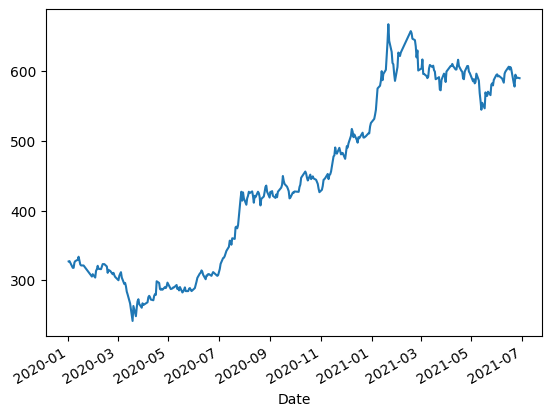

In [18]:
df["Close Price"].plot.line()

In [19]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x125f875d0>
File:           /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as '

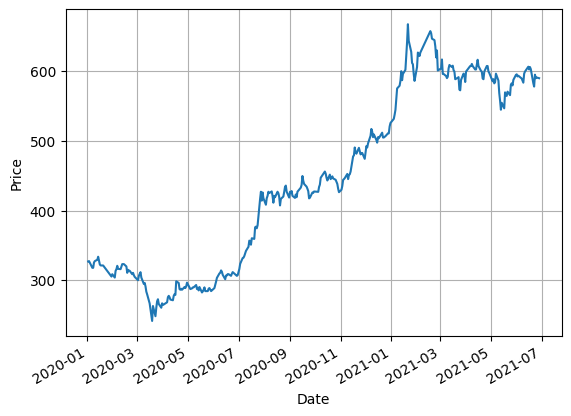

In [20]:
fig = df["Close Price"].plot.line(grid = True, ylabel = "Price")
# fig.set_ylabel("Price")

<Axes: xlabel='Date'>

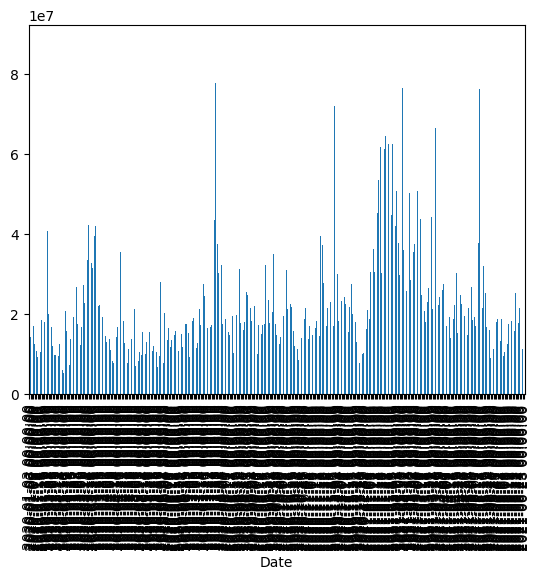

In [21]:
df["Volume"].plot.bar() # See https://stackoverflow.com/questions/30133280/pandas-bar-plot-changes-date-format

<Axes: xlabel='Date'>

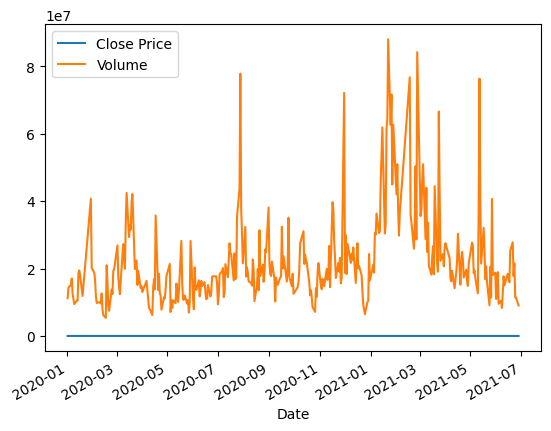

In [22]:
df[["Close Price", "Volume"]].plot.line()

### Calculation: rolling(), mean()

In [23]:
df["SMA5"] = df["Close Price"].rolling(5).mean() # SMA: simple moving average

df.head()

,Close Price,Volume,SMA5
Date,,,
2020-01-02,326.9394,11224165,NaN
2020-01-03,327.4216,14295651,NaN
2020-01-06,320.1884,15210531,NaN
2020-01-07,317.7774,17053282,NaN
2020-01-08,317.7774,12484410,322.02084


<Axes: xlabel='Date'>

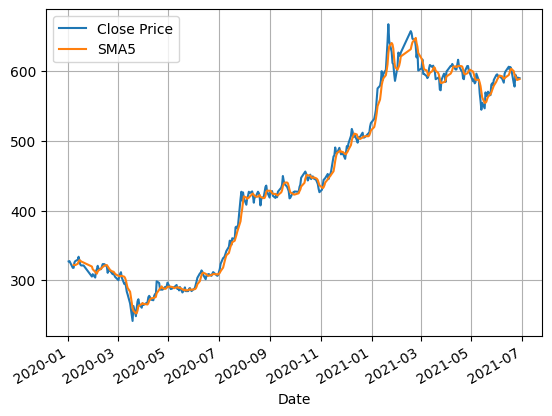

In [24]:
df[["Close Price", "SMA5"]].plot.line(grid = True)

In [25]:
df["Bias"] = (df["Close Price"] - df["SMA5"]) / df["SMA5"] * 100 # Bias: 乖離率

df["Bias"].head(8)

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08   -1.317753
2020-01-09    1.169074
2020-01-10    1.768580
2020-01-13    1.788382
Name: Bias, dtype: float64

Text(0, 0.5, 'Bias (%)')

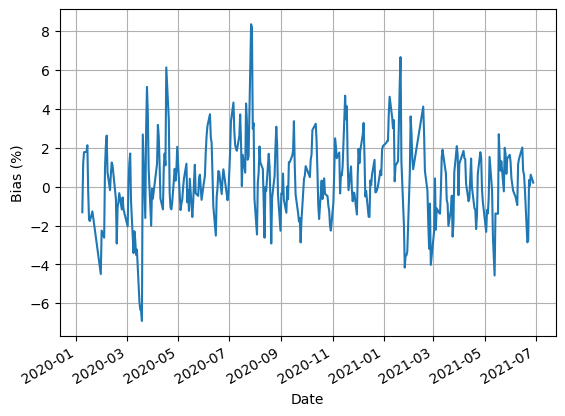

In [26]:
ax = df["Bias"].plot.line(grid = True)
ax.set_ylabel("Bias (%)")

### Calculation: Percentage Change

In [27]:
df["Return rate (%)"] = df["Close Price"].pct_change() * 100

Text(0, 0.5, 'Return rate (%)')

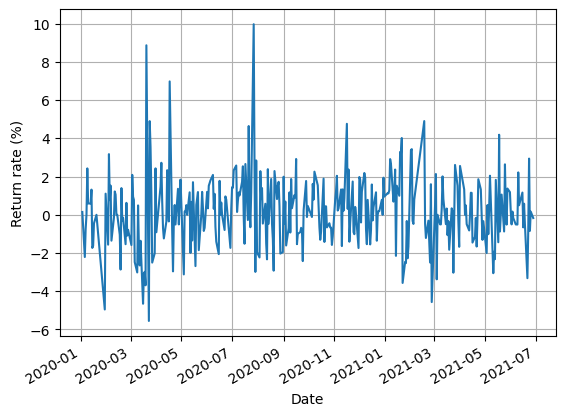

In [28]:
ax = df["Return rate (%)"].plot.line(grid = True)
ax.set_ylabel("Return rate (%)")

Text(0.5, 0, 'Return rate (%)')

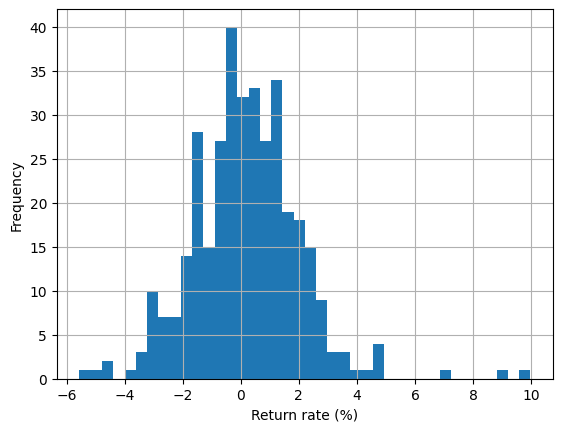

In [29]:
ax = df["Return rate (%)"].plot.hist(bins = 40, grid = True)
ax.set_xlabel("Return rate (%)")

### Filtering

In [30]:
df["Return rate (%)"]

Date
2020-01-02         NaN
2020-01-03    0.147489
2020-01-06   -2.209140
2020-01-07   -0.752994
2020-01-08    0.000000
                ...   
2021-06-22   -0.857633
2021-06-23    2.941176
2021-06-24   -0.840336
2021-06-25    0.169492
2021-06-28   -0.169205
Name: Return rate (%), Length: 359, dtype: float64

In [31]:
mask1 = df["Return rate (%)"] >= 5
mask2 = df["Return rate (%)"] <= -5

mask = mask1 | mask2  # logical operator: & (and), | (or)

In [32]:
df.index[mask]

DatetimeIndex(['2020-03-20', '2020-03-23', '2020-04-17', '2020-07-27'], dtype='datetime64[ns]', name='Date', freq=None)

In [33]:
len(df.index[mask])

4

<Axes: xlabel='Date'>

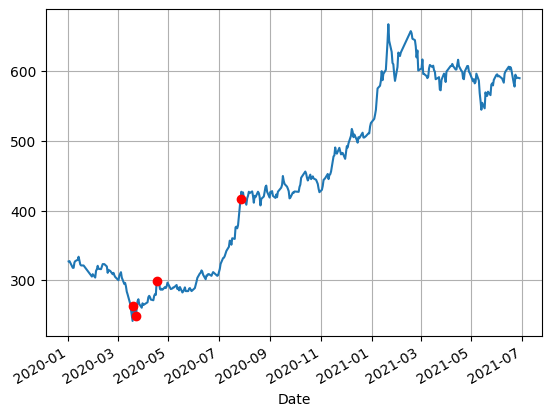

In [34]:
df["Close Price"].plot.line()
df["Close Price"][mask].plot.line(linestyle = "", marker = "o", color = "r", grid = True)

### Output to Files

In [35]:
df.head()

,Close Price,Volume,SMA5,Bias,Return rate (%)
Date,,,,,
2020-01-02,326.9394,11224165,NaN,NaN,NaN
2020-01-03,327.4216,14295651,NaN,NaN,0.147489
2020-01-06,320.1884,15210531,NaN,NaN,-2.209140
2020-01-07,317.7774,17053282,NaN,NaN,-0.752994
2020-01-08,317.7774,12484410,322.02084,-1.317753,0.000000


In [36]:
df.to_excel("output.xlsx") # output to a excel file

## Visualization

### Package: matplotlib

In [37]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)

### Example 1: Monte Carlo Simulation for $\pi$

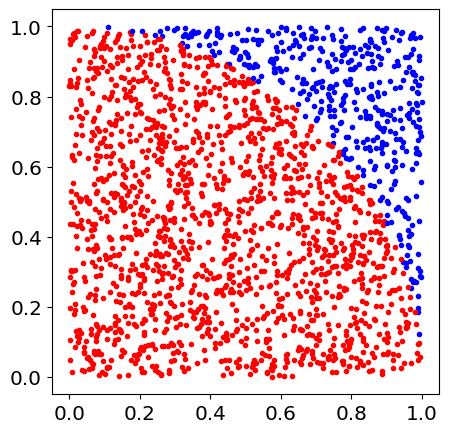

In [38]:
import random

N = 2000

plt.figure(figsize = (5, 5))
for i in range(N):
    
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    
    if x ** 2 + y ** 2 < 1:
        plt.plot(x, y, "r.")
    else:
        plt.plot(x, y, "b.")

### Example 2: One Figure Two Curves

In [39]:
import numpy as np

x = np.linspace(-np.pi, np.pi, 20)
y1, y2 = np.cos(x), np.sin(x)

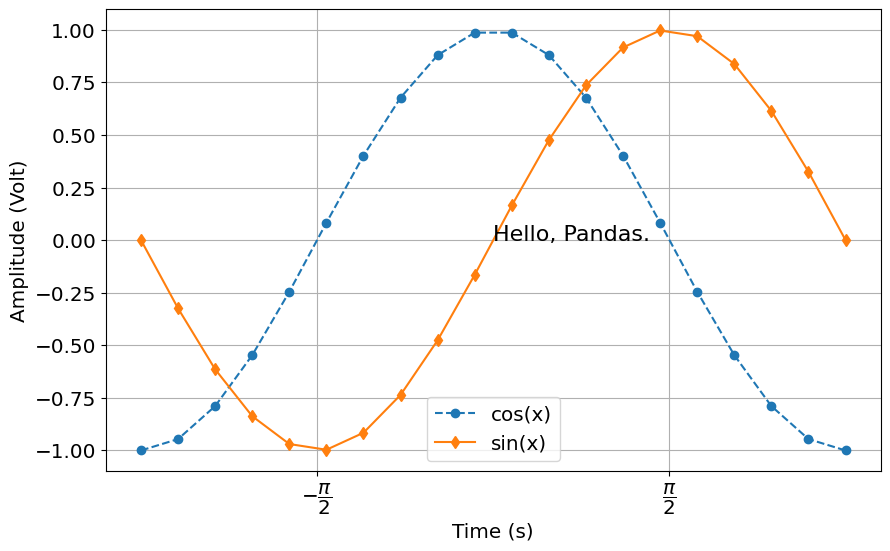

In [40]:
import matplotlib.pyplot as plt

gcf = plt.figure(figsize = (10, 6))
plt.plot(x, y1, marker = "o", linestyle = "--")
plt.plot(x, y2, marker = "d")

plt.xlabel("Time (s)")
plt.xticks([-np.pi / 2, np.pi / 2], labels = ["$-\dfrac{\pi}{2}$", "$\dfrac{\pi}{2}$"])
plt.ylabel("Amplitude (Volt)")
plt.legend(["cos(x)", "sin(x)"], loc = "lower center")
plt.text(0, 0, "Hello, Pandas.", fontsize = 16)
plt.grid(True)
plt.show()

In [41]:
gcf.savefig("example.jpg", dpi = 300)
gcf.savefig("example.pdf", dpi = 300)

### Example 3: Dual Y-Axis Plot

<Figure size 1200x600 with 0 Axes>

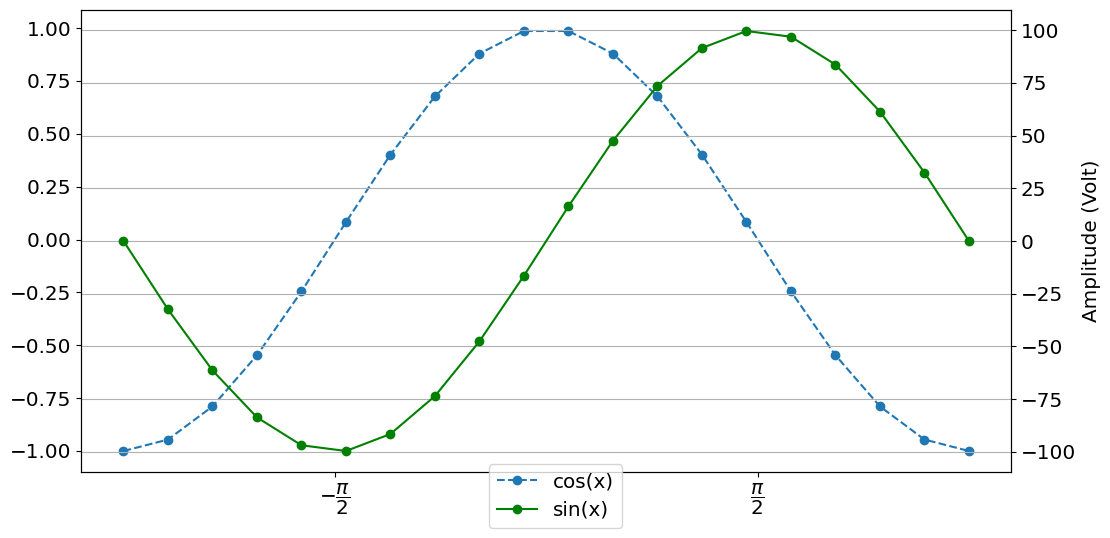

In [42]:
y2 = 100 * y2

plt.figure(figsize = (12, 6))
fig, ax1 = plt.subplots()
ax1.plot(x, y1, marker = "o", linestyle = "--")

ax2 = ax1.twinx()
ax2.plot(x, y2, color = "green", marker = "o")

plt.xlabel("Time (s)")
plt.xticks([-np.pi / 2, np.pi / 2], labels = ["$-\dfrac{\pi}{2}$", "$\dfrac{\pi}{2}$"])
plt.ylabel("Amplitude (Volt)")
fig.legend(["cos(x)", "sin(x)"], loc = "lower center")
plt.grid(True)

#### Exercise: Price and Volume

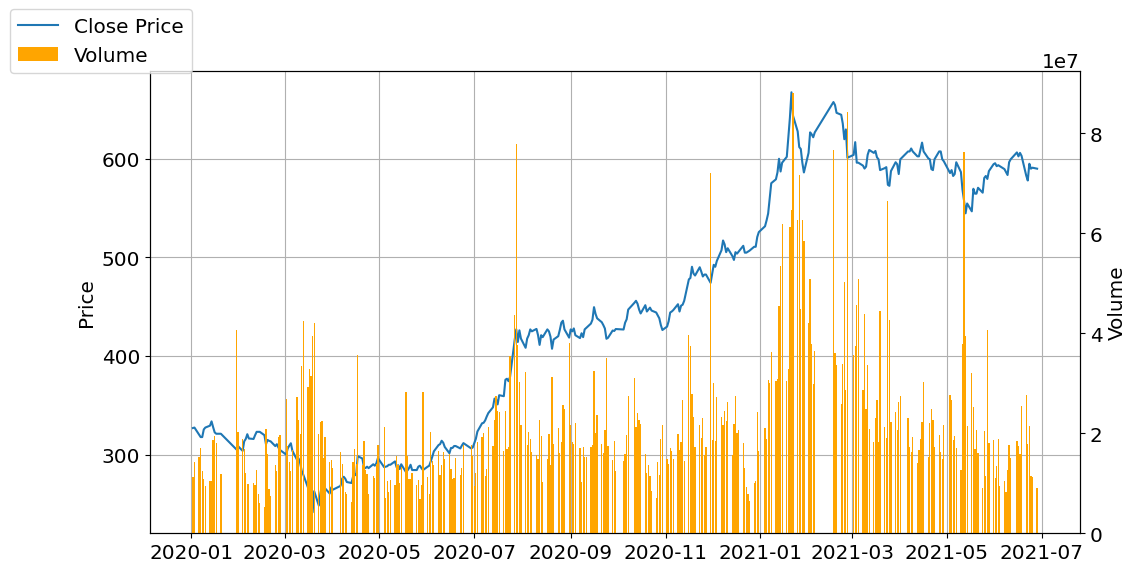

In [43]:
fig, ax1 = plt.subplots()
ax1.plot(df["Close Price"])
ax1.set_ylabel("Price")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.bar(x = df.index, height = df["Volume"], color = "orange")
ax2.set_ylabel("Volume")

fig.legend(["Close Price", "Volume"], loc = "upper left")

### Example 4: Subplots

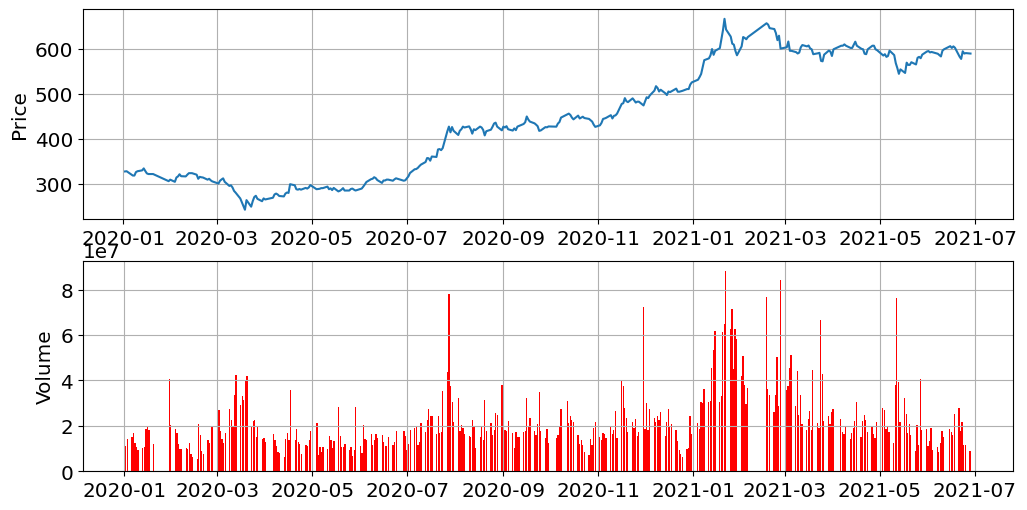

In [44]:
plt.subplot(211)
plt.plot(df["Close Price"])
plt.ylabel("Price")
plt.grid(True)

plt.subplot(212)
plt.bar(x = df.index, height = df["Volume"], color = "red")
plt.ylabel("Volume")
plt.grid(True)